In [2]:
import requests
import pandas as pd
from itertools import product

# URL til SSB API for tabell 03024
api_url = "https://data.ssb.no/api/v0/no/table/03024/"

# Definerer en tom API-spørring (henter alt)
query = {
    "query": [],
    "response": {
        "format": "json-stat2"
    }
}

# Hente data fra API
response = requests.post(api_url, json=query)

# Sjekke om forespørselen var vellykket
if response.status_code == 200:
    data = response.json()

    # Hente dimensjoner og verdier
    dimension_names = list(data["dimension"].keys())
    values = data["value"]

    # Generere alle kombinasjoner av dimensjonsverdier
    dimensions = [list(data["dimension"][dim]["category"]["label"].values()) for dim in dimension_names]
    all_combinations = list(product(*dimensions))

    # Lage en DataFrame
    df = pd.DataFrame(all_combinations, columns=dimension_names)
    df["Value"] = values

    # Pivotere for å få bedre struktur
    df_pivot = df.pivot_table(
        index="Tid",
        columns=["VareGrupper2", "ContentsCode"],
        values="Value",
        aggfunc="sum"
    ).reset_index()

    # Flate ut kolonnenavn
    df_pivot.columns = ["Tid"] + [f"{i[0]} - {i[1]}" for i in df_pivot.columns[1:]]

    #  Filtrer kun rader fra 2024
    df_2024 = df_pivot[df_pivot["Tid"].str.startswith("2024")].copy()

    #  Bruk riktige kolonnenavn (fra tidligere)
    fersk_col = "Fersk oppalen laks - Vekt (tonn)"
    frossen_col = "Frosen oppalen laks - Vekt (tonn)"

    #  Vis uke for uke
    print("\n Fersk og frossen oppalen laks – Vekt per uke i 2024:")
    for t, f, fr in zip(df_2024["Tid"], df_2024[fersk_col], df_2024[frossen_col]):
        print(f"{t}: Fersk {f} tonn | Frossen {fr} tonn")

    # Totaler
    total_fersk = df_2024[fersk_col].sum()
    total_frossen = df_2024[frossen_col].sum()

    print(f"\nTotal fersk oppalen laks (tonn) i 2024: {total_fersk}")
    print(f"  Total frossen oppalen laks (tonn) i 2024: {total_frossen}")

else:
    print(f"Feil ved henting av data: {response.status_code}")
    print(response.text)



 Fersk og frossen oppalen laks – Vekt per uke i 2024:
2024U01: Fersk 12105.0 tonn | Frossen 175.0 tonn
2024U02: Fersk 16016.0 tonn | Frossen 475.0 tonn
2024U03: Fersk 14622.0 tonn | Frossen 358.0 tonn
2024U04: Fersk 15342.0 tonn | Frossen 374.0 tonn
2024U05: Fersk 13511.0 tonn | Frossen 342.0 tonn
2024U06: Fersk 15862.0 tonn | Frossen 487.0 tonn
2024U07: Fersk 13639.0 tonn | Frossen 367.0 tonn
2024U08: Fersk 10687.0 tonn | Frossen 471.0 tonn
2024U09: Fersk 12959.0 tonn | Frossen 441.0 tonn
2024U10: Fersk 14487.0 tonn | Frossen 493.0 tonn
2024U11: Fersk 14619.0 tonn | Frossen 511.0 tonn
2024U12: Fersk 13493.0 tonn | Frossen 623.0 tonn
2024U13: Fersk 9512.0 tonn | Frossen 518.0 tonn
2024U14: Fersk 11675.0 tonn | Frossen 463.0 tonn
2024U15: Fersk 13015.0 tonn | Frossen 617.0 tonn
2024U16: Fersk 11766.0 tonn | Frossen 529.0 tonn
2024U17: Fersk 12923.0 tonn | Frossen 309.0 tonn
2024U18: Fersk 11511.0 tonn | Frossen 244.0 tonn
2024U19: Fersk 10617.0 tonn | Frossen 476.0 tonn
2024U20: Fersk 

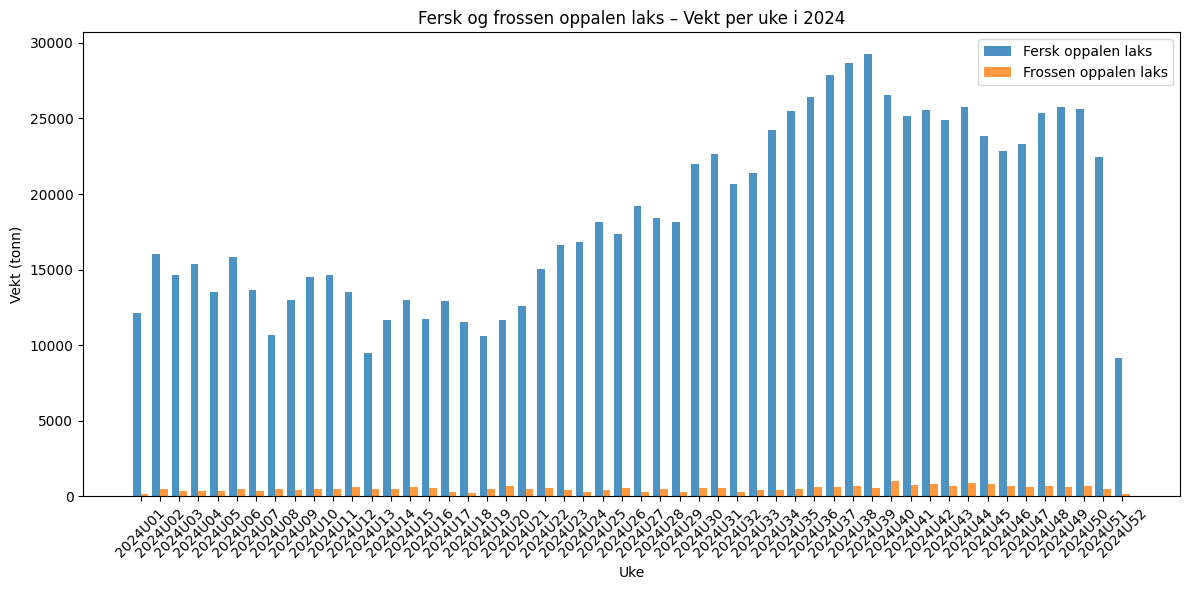

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# X-aksen: uker
x = np.arange(len(df_2024))  # numerisk indeks for plassering
width = 0.4  # bredde på søylene

# Kolonnenavn (hvis de er definert tidligere)
# fersk_col = "Fersk"
# frossen_col = "Frossen"

plt.figure(figsize=(12, 6))

# Fersk og frossen i separate søyler
plt.bar(x - width/2, df_2024[fersk_col], width=width, label="Fersk oppalen laks", alpha=0.8)
plt.bar(x + width/2, df_2024[frossen_col], width=width, label="Frossen oppalen laks", alpha=0.8)

# Stil og detaljer
plt.title("Fersk og frossen oppalen laks – Vekt per uke i 2024")
plt.xlabel("Uke")
plt.ylabel("Vekt (tonn)")
plt.xticks(x, df_2024["Tid"], rotation=45)
plt.legend()
plt.tight_layout()

# Vis plottet
plt.show()


Her bruker vi list-comprehension til å kun hente ut vekt av fersk og frossen laks i 2024. Her har vi også visalusert resultatet. 